In [309]:
import glob
import os
import numpy as np
import shutil
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [310]:
data_dir=r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4'
artifacts_dir="artifacts"
cancer_regions='cancer_regions'
normal_regions='normal_regions'
other='other'

# Utils

In [314]:
def save_pickle(a,path):
    with open(path,'wb') as f:
        pickle.dump(a,f)
def load_pickle(path):
    with open(path,'rb') as f:
        res=pickle.load(f)
    return res

def return_sort_image_list(data_dir,file_dir):
    file_list=os.listdir(os.path.join(data_dir, file_dir))
    li=[]
    for file in file_list:
        num=int(file.split('.')[0])
        li.append(num)
    li.sort()
    return_list=[]
    for i in li:
        name=str(i)+'.png'
        return_list.append(name)
    return return_list

In [326]:
artifacts_li=return_sort_image_list(data_dir,artifacts_dir)
cancer_li=return_sort_image_list(data_dir,cancer_regions)
normal_li=return_sort_image_list(data_dir,normal_regions)
other_li=return_sort_image_list(data_dir,other)


In [318]:
from PIL import Image
def mkdir_if_not_exist(path): 
    if not os.path.exists(path):
        os.makedirs(path)

def change_name(data_dir,file_dir,file_list):
    i=0
    new_path=data_dir+"\\new"
    new_name_list=[]
    for image_name in file_list:
        path=os.path.join(data_dir,file_dir,image_name)
        im=Image.open(path)
        new_name=file_dir+"_{}.png".format(str(i))
        save_path=os.path.join(new_path,file_dir)
        mkdir_if_not_exist(save_path)
        im.save(os.path.join(new_path,file_dir,new_name))
        new_name_list.append(new_name)
        i=i+1
    return new_name_list
        

In [321]:
artifacts_new_li=change_name(data_dir,artifacts_dir,artifacts_li)
cancer__new_li=change_name(data_dir,cancer_regions,cancer_li)
normal_new_li=change_name(data_dir,normal_regions,normal_li)
other_new_li=change_name(data_dir,other,other_li)


### get means and stds 

In [143]:

import cv2
# calculate means and std
 
img_h, img_w = 128, 128
imgs = np.zeros([img_w, img_h, 3, 1])
means, stdevs = [], []


all_image_files=glob.glob(os.path.join(data_dir,artifacts_dir,"*"))\
+glob.glob(os.path.join(data_dir,cancer_regions,"*"))\
+glob.glob(os.path.join(data_dir,normal_regions,"*"))\
+glob.glob(os.path.join(data_dir,other,"*"))

for i in range(len(all_image_files)):
    img_path = all_image_files[i]
    img = cv2.imread(img_path)
    img = img[:, :, :, np.newaxis]    
    imgs = np.concatenate((imgs, img), axis=3)
    if i%500==0:
        print(i)
imgs = imgs.astype(np.float32)/255
 

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500


In [146]:
for i in range(3):
    pixels = imgs[:,:,i,:].ravel()  
    means.append(np.mean(pixels))
    stdevs.append(np.std(pixels))

means.reverse()
stdevs.reverse()

In [147]:
means

[0.6341895, 0.4980002, 0.64840436]

In [5]:
path='./means.pkl'
path2='./stds.pkl'


In [ ]:
save_pickle(means,path)
save_pickle(stdevs,path2)

In [148]:
stdevs

[0.22627775, 0.27285302, 0.22700454]

In [6]:
means=load_pickle(path)
stdevs=load_pickle(path2)

### generate train，valid and test files

In [323]:
train_dir=os.path.join(data_dir,'new','trainSet')
train_valid_dir=os.path.join(data_dir,'new','train_valid_Set')
valid_dir=os.path.join(data_dir,'new','validSet')
test_dir=os.path.join(data_dir,'new','testSet')
train_valid_dir

'D:\\CS\\NTU\\BS6207\\Assign\\BS6207-assignment4\\new\\train_valid_Set'

In [324]:
def copy_to_files(new_data_dir,data_dir,file_dir,file_list,test_size,valid_ratio):
    train_dir,valid_dir,test_dir,train_valid_dir=new_data_dir
    train_dir=train_dir+'\\'+file_dir
    valid_dir=valid_dir+"\\"+file_dir
    test_dir=test_dir+"\\"+file_dir
    trian_valid_dir=train_valid_dir+"\\"+file_dir
    
    mkdir_if_not_exist(train_dir)
    mkdir_if_not_exist(valid_dir)
    mkdir_if_not_exist(test_dir)
    mkdir_if_not_exist(trian_valid_dir)
    
    #get test_files
    test_lists=file_list[0:test_size]    
    
    #get train and valid files
    remain_list=list(set(file_list)-set(test_lists))
    
    #copy to train_set
    for i_name in remain_list:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),trian_valid_dir+'\\'+i_name)
    
    valid_lists=np.random.choice(remain_list,size=int(len(remain_list)*valid_ratio),replace=False)
    train_lists=list(set(remain_list)-set(valid_lists))
    np.random.shuffle(train_lists)
    

    
    #copy to train_set
    for i_name in train_lists:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),train_dir+'\\'+i_name)
        
    #copy to valid_set
    for i_name in valid_lists:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),valid_dir+'\\'+i_name)
        
    #copy to test_set
    for i_name in test_lists:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),test_dir+"\\"+i_name)

In [325]:
new_data_dir=[train_dir,valid_dir,test_dir,train_valid_dir]
copy_to_files(new_data_dir,data_dir,artifacts_dir,artifacts_new_li,100,0.2)
copy_to_files(new_data_dir,data_dir,cancer_regions,cancer__new_li,100,0.2)
copy_to_files(new_data_dir,data_dir,normal_regions,normal_new_li,100,0.2)
copy_to_files(new_data_dir,data_dir,other,other_new_li,100,0.2)

### implement hyperparamters

### transforms and get labels

In [142]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
train_transform=transforms.Compose([
    transforms.RandomResizedCrop(128, scale=(0.64, 1.0),ratio=(1.0,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    transforms.Normalize(means,stdevs)
])

test_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means,stdevs)
])

#generate dataloader
train_ds=ImageFolder(train_dir,transform=train_transform)
valid_ds=ImageFolder(valid_dir,transform=test_transform)
test_ds=ImageFolder(test_dir,transform=test_transform)



# Models

In [267]:
import torch
from torch import nn
import torch.nn.functional as F

class Residual(nn.Module):
    def __init__(self,in_channels,out_channels,use_1x1conv=False,stride=1):
        super(Residual,self).__init__()
        self.conv1 = nn.Conv2d(in_channels,out_channels,kernel_size=3, padding=1,stride=stride)
        self.conv2 = nn.Conv2d(out_channels,out_channels,kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(in_channels,out_channels, kernel_size=1,stride=stride)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self,X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return F.relu(Y + X)


class CNNModel_pool_residual(nn.Module):
    def __init__(self,in_channels,out_dim,lin_architecture,res_architecture,kernel_params,dropout=False,pooling_method='max'):
        super(CNNModel_pool_residual,self).__init__()
        
        kernel_size,strides,res_stride=kernel_params
        

        x_in=in_channels
        #residual nets
        self.cnn = nn.Sequential(
            nn.Conv2d(3, res_architecture[0], kernel_size=3, padding=1,stride=2),  # [64, 64, 64]
            nn.BatchNorm2d(res_architecture[0]),
            nn.ReLU(),
        )
        
        H=res_architecture[0]
        W=res_architecture[0]
        
        def resnet_block(in_channels, out_channels, num_residuals,H,W,first_block=False):
            if first_block:
                assert in_channels == out_channels 
            blk = []
            for i in range(num_residuals):
                if i == 0 and not first_block:
                    blk.append(Residual(in_channels, out_channels, use_1x1conv=True, stride=res_stride))
                    H=int((H+2*1-2-1)/res_stride+1)
                    W=int((W+2*1-2-1)/res_stride+1)
                else:
                    blk.append(Residual(out_channels, out_channels))
            return blk,H,W
        
        self.residual=[]
        for i in range(len(res_architecture)):
            if i==0:
                blk,H,W=resnet_block(res_architecture[i],res_architecture[i],2,H,W,first_block=True)
                self.residual+=blk
            else:
                blk,H,W=resnet_block(x_in,res_architecture[i],2,H,W)
                self.residual+=blk
            if pooling_method=='max':
                self.residual.append(nn.MaxPool2d(kernel_size=kernel_size,stride=strides))
                H=(H+0-(kernel_size-1)-1)//strides+1
                W=(W+0-(kernel_size-1)-1)//strides+1
            elif pooling_method=='ave':
                self.residual.append(torch.nn.AvgPool2d(kernel_size=2,stride=strides))
                H=(H+2*0-kernel_size)//strides+1
                W=(W+2*0-kernel_size)//strides+1
            x_in=res_architecture[i]
        
        _shape=res_architecture[-1]*W*H #256*2*2
        # linear classifer
        self.fc=[]
        for i in range(len(lin_architecture)):
            self.fc.append(nn.Linear(_shape,lin_architecture[i]))
            self.fc.append(nn.ReLU())
            if dropout==False:
                self.dropout=None
            else:
                self.fc.append(nn.Dropout(dropout))
            _shape=lin_architecture[i]
            
        self.output=nn.Linear(_shape,out_dim)
        self.flatten=nn.Flatten()
    def forward(self,X):
        X=self.cnn(X)
        for net in self.residual:
            X=net(X)
        X=self.flatten(X)
        for net2 in self.fc:
            X=net2(X)
        
        return self.output(X)

In [161]:
blk = Residual(3, 3)
X = torch.rand((4, 3, 6, 6))
blk(X).shape

torch.Size([4, 3, 6, 6])

In [162]:
blk = Residual(3, 3,True,2)
X = torch.rand((4, 3, 6, 6))
blk(X).shape 

torch.Size([4, 3, 3, 3])

In [284]:
class CNNModel_pool_normal(nn.Module):
    def __init__(self,dropout=None):
        super(CNNModel_pool_normal, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1,stride=2),  # [64, 64, 64]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [64, 32, 32]

            nn.Conv2d(64, 128, kernel_size=3, padding=1,stride=2), # [128, 16, 16]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [128, 8, 8]

            nn.Conv2d(128, 256, kernel_size=3, padding=1,stride=2), # [256, 4, 4]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [256, 2, 2]
        )
        self.flatten=nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 4)
        )

    def forward(self, x):
        out = self.cnn(x)
        out = self.flatten(out)
        return self.fc(out)

# Main()

In [143]:
batch_size=128
train_iter=DataLoader(train_ds,batch_size, shuffle=True)
valid_iter=DataLoader(valid_ds,batch_size, shuffle=True)


In [169]:
# hyperparameters

lr=0.01
dropout=0.6

In [344]:
def train(net,train_iter,valid_iter,optim,epoches,early_stop=False,name=None):
    history_loss=dict()
    history_acc=dict()
    history_loss["val"]=[]
    history_loss["train"]=[]
        
    history_acc["val"]=[]
    history_acc["train"]=[]
    best_acc=0
    for epoch in range(epoches):
        print("processing the {} epoch".format(epoch))
        epoch_start_time = time.time()
        train_acc = []
        train_loss = []
        val_acc = []
        val_loss = []
        len_train=0
        net.train()
        for batch_x,batch_y in train_iter:
#             print(batch_x.shape)
#             print(batch_y.shape)
            y_hat=net(batch_x)
            l=loss(y_hat,batch_y)
            optim.zero_grad()
            l.backward()
            optim.step()
            train_acc.append(np.sum(np.argmax(y_hat.detach().numpy(),axis=1)==batch_y.detach().numpy()))
            train_loss.append(l.item())
#             print("finish {} batch in {} epoch".format(i,epoch))
            len_train+=batch_x.shape[0]

        train_loss=np.sum(train_loss)/len_train
        train_acc=np.sum(train_acc)/len_train
        history_loss["train"].append(train_loss)
        history_acc["train"].append(train_acc)
        if valid_iter is not None:
            #eval
            net.eval()
            len_val=0
            with torch.no_grad():
                for batch_x,batch_y in valid_iter:
                    y_hat=net(batch_x)
                    l=loss(y_hat,batch_y)
                    val_acc.append(np.sum(np.argmax(y_hat.numpy(),axis=1)==batch_y.numpy()))
                    val_loss.append(l.item())
                    len_val+=batch_x.shape[0]

            val_loss=np.sum(val_loss)/len_val
            val_acc=np.sum(val_acc)/len_val
            history_loss["val"].append(val_loss)
            history_acc["val"].append(val_acc)
            print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
                    (epoch + 1, epoches, time.time()-epoch_start_time, \
                     train_acc, train_loss, val_acc, val_loss))          
        else:
            print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
                    (epoch + 1, epoches, time.time()-epoch_start_time, \
                     train_acc, train_loss))
        if name==None:
            PATH =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_epoch_{}'.format(epoch)
        else:
            PATH =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\{}_epoch_{}'.format(name,epoch)
            
        #self-implement early stop
        if early_stop==True:
            if val_acc > best_acc:
                best_acc = val_acc
                es = 0
                torch.save(net.state_dict(), PATH)
                print('Model saved at {}'.format(PATH))
            else:
                es += 1
                print("Counter {} of 10".format(es))
            if es > 9:
                print("Early stopping with best_acc: ", best_acc, "and val_acc for this epoch: ", val_acc, "...")
                break
        else:
            if epoch%2==0:
                torch.save(net.state_dict(), PATH)
                print('Model saved at {}'.format(PATH))
            
    return history_loss,history_acc

In [363]:
def test(net,test_iter):
    
    for epoch in range(1):
        print("processing the {} epoch".format(epoch))
        epoch_start_time = time.time()
        #eval
        net.eval()
        test_acc=[]
        test_loss=[]
        len_test=0
        with torch.no_grad():
            for batch_x,batch_y in test_iter:
                y_hat=net(batch_x)
                l=loss(y_hat,batch_y)
                test_acc.append(np.sum(np.argmax(y_hat.numpy(),axis=1)==batch_y.numpy()))
                test_loss.append(l.item())
                len_test+=batch_x.shape[0]
            
        test_loss=np.sum(test_loss)/len_test
        test_acc=np.sum(test_acc)/len_test
        print('[%03d/%03d] %2.2f sec(s) Test Acc: %3.6f Loss: %3.6f' % \
                (epoch + 1, 1, time.time()-epoch_start_time, \
                 test_acc, test_loss))
        return test_loss,test_acc

In [128]:
model_normal=CNNModel_pool_normal()
optim=torch.optim.Adam(model_normal.parameters(),lr=lr)
loss=nn.CrossEntropyLoss()

In [129]:
his_loss,his_acc=train(model_normal,train_iter,valid_iter,optim,30,early_stop=False,name="model_normal")

processing the 0 epoch
[001/030] 70.00 sec(s) Train Acc: 0.620478 Loss: 0.015586 | Val Acc: 0.736196 loss: 0.005363
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_normal_epoch_0
processing the 1 epoch
[002/030] 69.56 sec(s) Train Acc: 0.714833 Loss: 0.005569 | Val Acc: 0.793712 loss: 0.004313
processing the 2 epoch
[003/030] 68.66 sec(s) Train Acc: 0.772249 Loss: 0.004516 | Val Acc: 0.799847 loss: 0.004504
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_normal_epoch_2
processing the 3 epoch
[004/030] 69.65 sec(s) Train Acc: 0.804211 Loss: 0.004003 | Val Acc: 0.865798 loss: 0.003088
processing the 4 epoch
[005/030] 70.72 sec(s) Train Acc: 0.829856 Loss: 0.003514 | Val Acc: 0.865798 loss: 0.003472
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_normal_epoch_4
processing the 5 epoch
[006/030] 71.67 sec(s) Train Acc: 0.854354 Loss: 0.003159 | Val Acc: 0.773773 loss: 0.006310
processing the 6 epoch
[007/030] 69.80 sec(s) Tra

In [236]:
train_acc_normal=[0.620478,0.714833,0.772249,0.804211,0.829856,0.854354,0.873493,0.863923,0.869474,0.892249,0.891100,0.901627,0.906411,0.918469,0.917703,
0.918852 ,0.914641 ,0.920383 ,0.921340 ,0.920957 ,0.921531 ,0.930526,0.926316,0.938373  ,0.937990  ,0.929952,0.938565 ,0.937225  ,0.938565 ,0.940478 ]

In [237]:
len(train_acc_normal)

30

In [238]:
val_acc_normal=[0.736196 ,0.793712 ,0.799847 ,0.865798 ,0.865798 ,0.773773 ,0.859663 ,0.879601 ,0.909509 ,0.937117 ,0.851994 ,0.854294 ,0.929448 ,
        0.919479 ,0.879601 ,0.932515 ,0.947853 ,0.923313 ,0.945552 ,0.912577 ,0.932515 ,0.888804 ,0.939417 ,0.941718 ,0.921779 ,0.944018 ,
        0.936350 ,0.857362,0.947853 ,0.912577  ]

In [235]:
len(val_acc_normal)

30

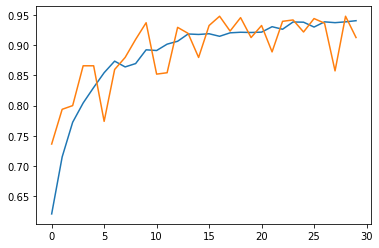

In [239]:
plt.plot(train_acc_normal)
plt.plot(val_acc_normal)

In [158]:
path=r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_normal_epoch_16'

model_normal=CNNModel_pool_normal()
model_normal.load_state_dict(torch.load(path))

<All keys matched successfully>

In [159]:
test(model_normal,test_iter)

processing the 0 epoch
[001/001] 2.11 sec(s) Test Acc: 0.945000 Loss: 0.001620


### start to train with no dropout,no maxpooling in residual, kernelsize==2,stride==2, residual_stride==2

In [222]:
out_dim=4
in_channel=3
lin_architecture=[512]
res_architecture=[64,128,256]
kernel_params=[2,2,2]

In [223]:
Model_pool_residual=CNNModel_pool_residual(in_channel,out_dim,lin_architecture,res_architecture,kernel_params)
optim=torch.optim.Adam(Model_pool_residual.parameters(),lr=lr)
loss=nn.CrossEntropyLoss()

In [224]:
hist_loss,hist_acc=train(Model_pool_residual,train_iter,valid_iter,optim,30,early_stop=False)

processing the 0 epoch
[001/030] 466.06 sec(s) Train Acc: 0.644211 Loss: 0.007507 | Val Acc: 0.720859 loss: 0.005653
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_epoch_0
processing the 1 epoch
[002/030] 452.78 sec(s) Train Acc: 0.694163 Loss: 0.006104 | Val Acc: 0.723160 loss: 0.005584
processing the 2 epoch
[003/030] 462.97 sec(s) Train Acc: 0.702775 Loss: 0.005993 | Val Acc: 0.694018 loss: 0.006374
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_epoch_2
processing the 3 epoch
[004/030] 465.22 sec(s) Train Acc: 0.717321 Loss: 0.005597 | Val Acc: 0.728528 loss: 0.005573
processing the 4 epoch
[005/030] 470.79 sec(s) Train Acc: 0.719617 Loss: 0.005633 | Val Acc: 0.752301 loss: 0.004843
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_epoch_4
processing the 5 epoch
[006/030] 467.36 sec(s) Train Acc: 0.729761 Loss: 0.005315 | Val Acc: 0.790644 loss: 0.004509
processing the 6 epoch
[007/030] 456.31 sec(s) Train Acc: 0.7255

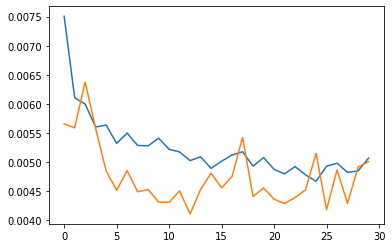

In [229]:
plt.plot(hist_loss["train"])
plt.plot(hist_loss["val"])

Text(0, 0.5, 'epoches')

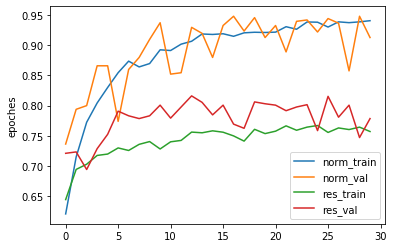

In [437]:
plt.plot(train_acc_normal)
plt.plot(val_acc_normal)
plt.plot(hist_acc["train"])
plt.plot(hist_acc["val"])
plt.legend(["norm_train","norm_val","res_train","res_val"])
plt.ylabel("accuracy")
plt.ylabel("epoches")

### fine tune the learning rate


In [253]:
lr=[0.1,0.001,0.0001]
history=[]
for i in lr:
    loss=nn.CrossEntropyLoss()
    model_normal=CNNModel_pool_normal()
    optim=torch.optim.Adam(model_normal.parameters(),lr=i)
    his_loss,his_acc=train(model_normal,train_iter,valid_iter,optim,30,early_stop=True,name="model_normal_learningrate_{}".format(i))
    history.append((his_loss,his_acc,model_normal,optim))
    print("Finish the learning rate {}".format(i))
    print("_"*10)

processing the 0 epoch
[001/030] 69.94 sec(s) Train Acc: 0.515024 Loss: 0.336066 | Val Acc: 0.681748 loss: 0.008050
processing the 1 epoch
[002/030] 67.41 sec(s) Train Acc: 0.660478 Loss: 0.007553 | Val Acc: 0.703988 loss: 0.007267
processing the 2 epoch
[003/030] 68.83 sec(s) Train Acc: 0.669091 Loss: 0.007112 | Val Acc: 0.695552 loss: 0.006876
Counter 1 of 10
processing the 3 epoch
[004/030] 69.18 sec(s) Train Acc: 0.681531 Loss: 0.006772 | Val Acc: 0.717791 loss: 0.006427
processing the 4 epoch
[005/030] 67.57 sec(s) Train Acc: 0.694354 Loss: 0.006549 | Val Acc: 0.736963 loss: 0.006212
processing the 5 epoch
[006/030] 68.34 sec(s) Train Acc: 0.698947 Loss: 0.006263 | Val Acc: 0.730061 loss: 0.006085
Counter 1 of 10
processing the 6 epoch
[007/030] 66.71 sec(s) Train Acc: 0.705263 Loss: 0.006128 | Val Acc: 0.733896 loss: 0.006088
Counter 2 of 10
processing the 7 epoch
[008/030] 70.35 sec(s) Train Acc: 0.710622 Loss: 0.005951 | Val Acc: 0.746933 loss: 0.005670
processing the 8 epoch
[

[016/030] 67.82 sec(s) Train Acc: 0.913684 Loss: 0.001806 | Val Acc: 0.940184 loss: 0.001430
processing the 16 epoch
[017/030] 67.94 sec(s) Train Acc: 0.922871 Loss: 0.001731 | Val Acc: 0.907209 loss: 0.002160
Counter 1 of 10
processing the 17 epoch
[018/030] 68.91 sec(s) Train Acc: 0.923636 Loss: 0.001702 | Val Acc: 0.941718 loss: 0.001613
processing the 18 epoch
[019/030] 70.74 sec(s) Train Acc: 0.928804 Loss: 0.001577 | Val Acc: 0.911810 loss: 0.001855
Counter 1 of 10
processing the 19 epoch
[020/030] 68.71 sec(s) Train Acc: 0.926316 Loss: 0.001541 | Val Acc: 0.927914 loss: 0.001836
Counter 2 of 10
processing the 20 epoch
[021/030] 68.44 sec(s) Train Acc: 0.930909 Loss: 0.001493 | Val Acc: 0.941718 loss: 0.001500
Counter 3 of 10
processing the 21 epoch
[022/030] 68.25 sec(s) Train Acc: 0.923254 Loss: 0.001699 | Val Acc: 0.913344 loss: 0.002329
Counter 4 of 10
processing the 22 epoch
[023/030] 68.23 sec(s) Train Acc: 0.932057 Loss: 0.001557 | Val Acc: 0.895706 loss: 0.002166
Counter 

Text(0.5, 1.0, 'valid')

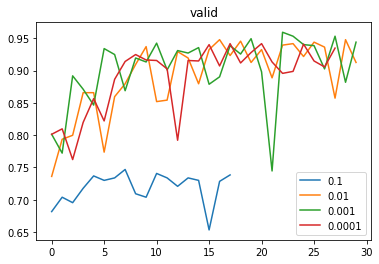

In [438]:
plt.plot(history[0][1]["val"])
plt.plot(val_acc_normal)
plt.plot(history[1][1]["val"])
plt.plot(history[2][1]["val"])
plt.legend([0.1,0.01,0.001,0.0001])
plt.title("valid")

Text(0.5, 1.0, 'train')

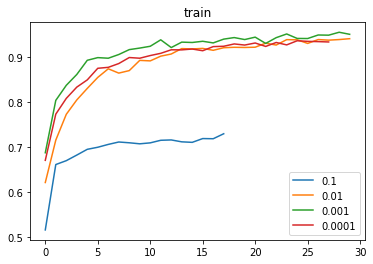

In [439]:
plt.plot(history[0][1]["train"])
plt.plot(train_acc_normal)
plt.plot(history[1][1]["train"])
plt.plot(history[2][1]["train"])
plt.legend([0.1,0.01,0.001,0.0001])
plt.title("train")

In [273]:
PATH =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\{}_lr_{}.txt'.format("model_normal",str(0.001))
torch.save(history[1][2].state_dict(),PATH)

In [286]:
test(history[1][2],test_iter)

processing the 0 epoch
[001/001] 2.20 sec(s) Test Acc: 0.952500 Loss: 0.001533


### Avgpooling

In [269]:
class CNNModel_avg_pool_normal(nn.Module):
    def __init__(self):
        super(CNNModel_avg_pool_normal, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1,stride=2),  # [64, 64, 64]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),      # [64, 32, 32]

            nn.Conv2d(64, 128, kernel_size=3, padding=1,stride=2), # [128, 16, 16]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),      # [128, 8, 8]

            nn.Conv2d(128, 256, kernel_size=3, padding=1,stride=2), # [256, 4, 4]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),      # [256, 2, 2]
        )
        self.flatten=nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 4)
        )

    def forward(self, x):
        out = self.cnn(x)
        
        out = self.flatten(out)
        return self.fc(out)

In [271]:
Model_avg_pool=CNNModel_avg_pool_normal()
optim=torch.optim.Adam(Model_avg_pool.parameters(),lr=0.001)
loss=nn.CrossEntropyLoss()
hist_loss_avg,hist_acc_avg=train(Model_avg_pool,train_iter,valid_iter,optim,30,early_stop=True,name="model_avg_pooling")

processing the 0 epoch
[001/030] 88.65 sec(s) Train Acc: 0.738182 Loss: 0.005417 | Val Acc: 0.821319 loss: 0.003944
processing the 1 epoch
[002/030] 86.22 sec(s) Train Acc: 0.792344 Loss: 0.004221 | Val Acc: 0.796012 loss: 0.004264
Counter 1 of 10
processing the 2 epoch
[003/030] 86.22 sec(s) Train Acc: 0.797703 Loss: 0.004102 | Val Acc: 0.845859 loss: 0.003536
processing the 3 epoch
[004/030] 86.86 sec(s) Train Acc: 0.812440 Loss: 0.003803 | Val Acc: 0.833589 loss: 0.003525
Counter 1 of 10
processing the 4 epoch
[005/030] 88.97 sec(s) Train Acc: 0.820670 Loss: 0.003601 | Val Acc: 0.861196 loss: 0.002990
processing the 5 epoch
[006/030] 88.41 sec(s) Train Acc: 0.836746 Loss: 0.003352 | Val Acc: 0.845859 loss: 0.003310
Counter 1 of 10
processing the 6 epoch
[007/030] 85.75 sec(s) Train Acc: 0.845933 Loss: 0.003187 | Val Acc: 0.871933 loss: 0.002794
processing the 7 epoch
[008/030] 86.98 sec(s) Train Acc: 0.868325 Loss: 0.002807 | Val Acc: 0.888804 loss: 0.002550
processing the 8 epoch
[

In [285]:
test(Model_avg_pool,test_iter)

processing the 0 epoch
[001/001] 2.09 sec(s) Test Acc: 0.947500 Loss: 0.001583


In [275]:
PATH =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\{}_lr_{}.txt'.format("model_avg_pooling",str(0.001))
torch.save(Model_avg_pool.state_dict(),PATH)

In [279]:
PATH=r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_avg_pooling_epoch_16'
model_best_avg=CNNModel_avg_pool_normal()
model_best_avg.load_state_dict(torch.load(PATH))
test(model_best_avg,test_iter)

processing the 0 epoch
[001/001] 2.76 sec(s) Test Acc: 0.917500 Loss: 0.002450


Text(0.5, 1.0, 'valid')

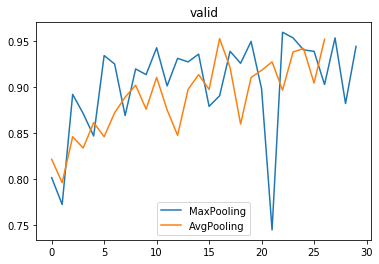

In [442]:
plt.plot(history[1][1]["val"])
plt.plot(hist_acc_avg["val"])
plt.legend(["MaxPooling","AvgPooling"])
plt.title("valid")

Text(0.5, 1.0, 'train')

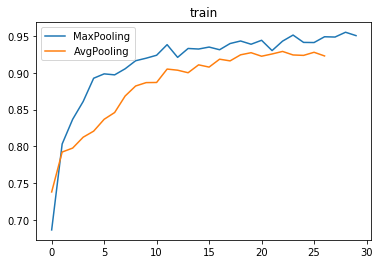

In [441]:
plt.plot(history[1][1]["train"])
plt.plot(hist_acc_avg["train"])
plt.legend(["MaxPooling","AvgPooling"])
plt.title("train")

### dropout select

In [299]:
class CNNModel_max(nn.Module):
    def __init__(self,dropout=None):
        super(CNNModel_max, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1,stride=2),  # [64, 64, 64]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [64, 32, 32]

            nn.Conv2d(64, 128, kernel_size=3, padding=1,stride=2), # [128, 16, 16]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [128, 8, 8]

            nn.Conv2d(128, 256, kernel_size=3, padding=1,stride=2), # [256, 4, 4]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [256, 2, 2]
        )
        self.flatten=nn.Flatten()
        self.fc = nn.Sequential()
        self.fc.add_module("linear1",nn.Linear(1024,512))
        self.fc.add_module("activ",nn.ReLU())
        if dropout!=None:
            self.fc.add_module("dropout",nn.Dropout(dropout))
        self.fc.add_module("linear2",nn.Linear(512,4))

    def forward(self, x):
        out = self.cnn(x)
        
        out = self.flatten(out)
        return self.fc(out)

In [302]:
dropout=[0.4,0.6,0.8]
history_dropout=[]
for i in dropout:
    model=CNNModel_max(dropout=i)
    loss=nn.CrossEntropyLoss()
    optim=torch.optim.Adam(model.parameters(),lr=0.001)
    his_loss,his_acc=train(model,train_iter,valid_iter,optim,30,early_stop=True,name='model_drop_out_{}'.format(i))
    history_dropout.append((his_loss,his_acc,model,optim))
    print("Finish epoches in {}".format(i))
    print("_"*10)

processing the 0 epoch
[001/030] 70.08 sec(s) Train Acc: 0.696077 Loss: 0.006010 | Val Acc: 0.840491 loss: 0.004745
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.4_epoch_0
processing the 1 epoch
[002/030] 68.56 sec(s) Train Acc: 0.802871 Loss: 0.004159 | Val Acc: 0.777607 loss: 0.004810
Counter 1 of 10
processing the 2 epoch
[003/030] 67.96 sec(s) Train Acc: 0.823923 Loss: 0.003698 | Val Acc: 0.841258 loss: 0.003997
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.4_epoch_2
processing the 3 epoch
[004/030] 68.16 sec(s) Train Acc: 0.874258 Loss: 0.002803 | Val Acc: 0.925613 loss: 0.002048
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.4_epoch_3
processing the 4 epoch
[005/030] 70.25 sec(s) Train Acc: 0.863732 Loss: 0.002888 | Val Acc: 0.877301 loss: 0.002782
Counter 1 of 10
processing the 5 epoch
[006/030] 71.62 sec(s) Train Acc: 0.895120 Loss: 0.002333 | Val Acc: 0.887270 loss: 0.003051

[001/030] 69.98 sec(s) Train Acc: 0.681148 Loss: 0.006522 | Val Acc: 0.782975 loss: 0.004632
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.8_epoch_0
processing the 1 epoch
[002/030] 68.51 sec(s) Train Acc: 0.770909 Loss: 0.004726 | Val Acc: 0.717025 loss: 0.006032
Counter 1 of 10
processing the 2 epoch
[003/030] 68.35 sec(s) Train Acc: 0.811100 Loss: 0.004035 | Val Acc: 0.644939 loss: 0.006973
Counter 2 of 10
processing the 3 epoch
[004/030] 68.27 sec(s) Train Acc: 0.835789 Loss: 0.003584 | Val Acc: 0.883436 loss: 0.002833
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.8_epoch_3
processing the 4 epoch
[005/030] 68.23 sec(s) Train Acc: 0.875981 Loss: 0.002933 | Val Acc: 0.882669 loss: 0.002399
Counter 1 of 10
processing the 5 epoch
[006/030] 68.51 sec(s) Train Acc: 0.870813 Loss: 0.002850 | Val Acc: 0.905675 loss: 0.002180
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.8_epoch_5
proces

In [337]:
test(history_dropout[0][2],test_iter)

processing the 0 epoch
[001/001] 2.56 sec(s) Test Acc: 0.937500 Loss: 0.001392


In [339]:
path=r"D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_drop_out_0.4_epoch_17"
model_4=CNNModel_max(dropout=0.4)
model_4.load_state_dict(torch.load(path))
test(model_4,test_iter)

processing the 0 epoch
[001/001] 2.20 sec(s) Test Acc: 0.937500 Loss: 0.001545


Text(0.5, 1.0, 'train')

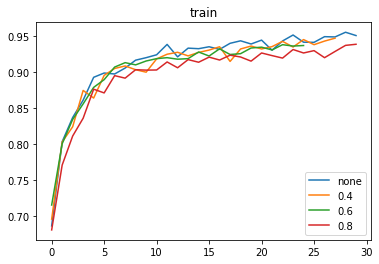

In [443]:
plt.plot(history[1][1]["train"])
plt.plot(history_dropout[0][1]["train"])
plt.plot(history_dropout[1][1]["train"])
plt.plot(history_dropout[2][1]["train"])
plt.legend(['none',0.4,0.6,0.8])
plt.title('train')

Text(0.5, 1.0, 'valid')

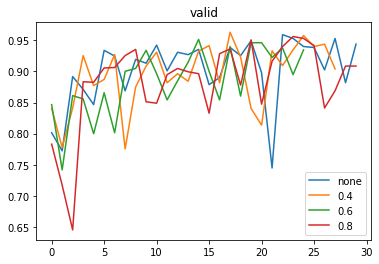

In [444]:
plt.plot(history[1][1]["val"])
plt.plot(history_dropout[0][1]["val"])
plt.plot(history_dropout[1][1]["val"])
plt.plot(history_dropout[2][1]["val"])
plt.legend(['none',0.4,0.6,0.8])
plt.title("valid")

# Train_all with valid data

In [330]:
train_valid_ds=ImageFolder(train_valid_dir,transform=train_transform)
train_valid_iter=DataLoader(train_valid_ds,batch_size, shuffle=True)

In [345]:
final_model=CNNModel_pool_normal()
loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(final_model.parameters(),lr=0.001)
his_loss_all,his_acc_all=train(final_model,train_valid_iter,None,optim,50,name="model_train_valid")

processing the 0 epoch
[001/050] 77.98 sec(s) Train Acc: 0.716802 Loss: 0.005818
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_epoch_0
processing the 1 epoch
[002/050] 75.86 sec(s) Train Acc: 0.798131 Loss: 0.004144
processing the 2 epoch
[003/050] 75.90 sec(s) Train Acc: 0.841783 Loss: 0.003560
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_epoch_2
processing the 3 epoch
[004/050] 75.89 sec(s) Train Acc: 0.839792 Loss: 0.003556
processing the 4 epoch
[005/050] 81.17 sec(s) Train Acc: 0.886200 Loss: 0.002604
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_epoch_4
processing the 5 epoch
[006/050] 77.05 sec(s) Train Acc: 0.891254 Loss: 0.002427
processing the 6 epoch
[007/050] 75.86 sec(s) Train Acc: 0.879461 Loss: 0.002681
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_epoch_6
processing the 7 epoch
[008/050] 75.95 sec(s) Train Acc: 0.912544 Loss: 0

In [346]:
his_loss_all_2,his_acc_all_2=train(final_model,train_valid_iter,None,optim,50,name="model_train_valid_50")

processing the 0 epoch
[001/050] 76.43 sec(s) Train Acc: 0.935672 Loss: 0.001461
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_50_epoch_0
processing the 1 epoch
[002/050] 76.25 sec(s) Train Acc: 0.947159 Loss: 0.001182
processing the 2 epoch
[003/050] 76.04 sec(s) Train Acc: 0.950835 Loss: 0.001240
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_50_epoch_2
processing the 3 epoch
[004/050] 76.10 sec(s) Train Acc: 0.945321 Loss: 0.001587
processing the 4 epoch
[005/050] 76.03 sec(s) Train Acc: 0.941339 Loss: 0.001301
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_50_epoch_4
processing the 5 epoch
[006/050] 76.04 sec(s) Train Acc: 0.944402 Loss: 0.001455
processing the 6 epoch
[007/050] 76.15 sec(s) Train Acc: 0.930464 Loss: 0.001537
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_50_epoch_6
processing the 7 epoch
[008/050] 75.93 sec(s) Train Acc: 0.95

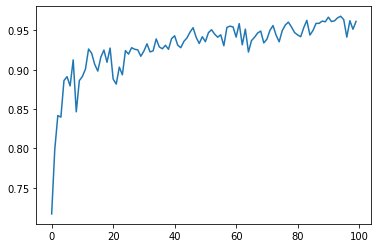

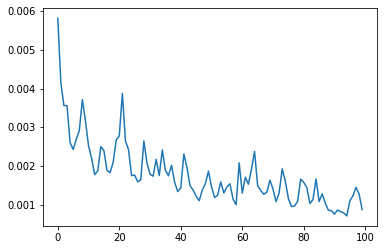

In [353]:
plt.plot(his_loss_all["train"]+his_loss_all_2["train"])

# set different data size

In [354]:
test(final_model,test_iter)

processing the 0 epoch
[001/001] 2.41 sec(s) Test Acc: 0.905000 Loss: 0.002401


In [371]:
test_iter=DataLoader(test_ds,batch_size, shuffle=False)

In [372]:
his_fi_acc_=[]
his_fi_loss_=[]
for i in range(24):
    path=r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_epoch_{}'.format(str(i*2))
    fi_model=CNNModel_pool_normal()
    fi_model.load_state_dict(torch.load(path))
    fi_loss,fi_acc=test(fi_model,test_iter)
    his_fi_loss_.append(fi_loss)
    his_fi_acc_.append(fi_acc) 

processing the 0 epoch
[001/001] 2.25 sec(s) Test Acc: 0.740000 Loss: 0.006994
processing the 0 epoch
[001/001] 2.21 sec(s) Test Acc: 0.775000 Loss: 0.004926
processing the 0 epoch
[001/001] 2.20 sec(s) Test Acc: 0.692500 Loss: 0.010215
processing the 0 epoch
[001/001] 2.17 sec(s) Test Acc: 0.740000 Loss: 0.007949
processing the 0 epoch
[001/001] 2.14 sec(s) Test Acc: 0.780000 Loss: 0.006631
processing the 0 epoch
[001/001] 2.19 sec(s) Test Acc: 0.875000 Loss: 0.005391
processing the 0 epoch
[001/001] 2.18 sec(s) Test Acc: 0.930000 Loss: 0.003290
processing the 0 epoch
[001/001] 2.21 sec(s) Test Acc: 0.895000 Loss: 0.004641
processing the 0 epoch
[001/001] 2.31 sec(s) Test Acc: 0.887500 Loss: 0.004813
processing the 0 epoch
[001/001] 2.15 sec(s) Test Acc: 0.935000 Loss: 0.003619
processing the 0 epoch
[001/001] 2.18 sec(s) Test Acc: 0.750000 Loss: 0.006703
processing the 0 epoch
[001/001] 2.18 sec(s) Test Acc: 0.920000 Loss: 0.002841
processing the 0 epoch
[001/001] 2.20 sec(s) Test Ac

In [373]:
his_fi_acc=[]
his_fi_loss=[]
for i in range(24):
    path=r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_50_epoch_{}'.format(str(i*2))
    fi_model=CNNModel_pool_normal()
    fi_model.load_state_dict(torch.load(path))
    fi_loss,fi_acc=test(fi_model,test_iter)
    his_fi_loss.append(fi_loss)
    his_fi_acc.append(fi_acc) 

processing the 0 epoch
[001/001] 2.18 sec(s) Test Acc: 0.865000 Loss: 0.005337
processing the 0 epoch
[001/001] 2.22 sec(s) Test Acc: 0.922500 Loss: 0.003507
processing the 0 epoch
[001/001] 2.20 sec(s) Test Acc: 0.915000 Loss: 0.002425
processing the 0 epoch
[001/001] 2.19 sec(s) Test Acc: 0.930000 Loss: 0.002601
processing the 0 epoch
[001/001] 2.17 sec(s) Test Acc: 0.930000 Loss: 0.002884
processing the 0 epoch
[001/001] 2.14 sec(s) Test Acc: 0.922500 Loss: 0.003779
processing the 0 epoch
[001/001] 2.18 sec(s) Test Acc: 0.857500 Loss: 0.005762
processing the 0 epoch
[001/001] 2.14 sec(s) Test Acc: 0.940000 Loss: 0.003392
processing the 0 epoch
[001/001] 2.15 sec(s) Test Acc: 0.882500 Loss: 0.003720
processing the 0 epoch
[001/001] 2.19 sec(s) Test Acc: 0.945000 Loss: 0.002477
processing the 0 epoch
[001/001] 2.15 sec(s) Test Acc: 0.950000 Loss: 0.002354
processing the 0 epoch
[001/001] 2.15 sec(s) Test Acc: 0.947500 Loss: 0.002004
processing the 0 epoch
[001/001] 2.14 sec(s) Test Ac

Text(0.5, 1.0, 'Size MAX(6529)')

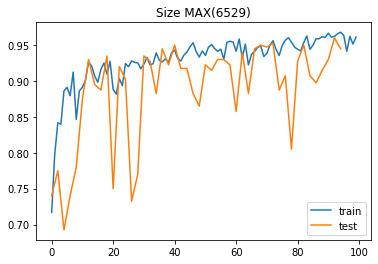

In [445]:
plt.plot(his_acc_all["train"]+his_acc_all_2["train"])
plt.plot(range(0,96,2),his_fi_acc_+his_fi_acc)
plt.legend(["train","test"])
plt.title("Size MAX(6529)")

In [377]:
path=r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_train_valid_50_epoch_{}'.format(str(44))
fi_model=CNNModel_pool_normal()
fi_model.load_state_dict(torch.load(path))
fi_loss,fi_acc=test(fi_model,test_iter)

processing the 0 epoch
[001/001] 2.31 sec(s) Test Acc: 0.960000 Loss: 0.001501


In [419]:
batch=[40]
i=40
while(i<6959):
    i*=2
    batch.append(i)
batch.pop()
batch

[40, 80, 160, 320, 640, 1280, 2560, 5120]

In [383]:
size_data=[]
for i in batch:
    train_valid_iter=DataLoader(train_valid_ds,i, shuffle=True)
    for batch_x,batch_y in train_valid_iter:
        size_data.append((batch_x,batch_y))
        break

In [414]:
import random

def train_sets(net,train_iter,valid_iter,optim,epoches,batch_size=128,early_stop=False,name=None):
    
    X,y=train_iter
    
    
    history_loss=dict()
    history_acc=dict()
    history_loss["val"]=[]
    history_loss["train"]=[]
        
    history_acc["val"]=[]
    history_acc["train"]=[]
    
    
    best_acc=0
    num_batchs=X.shape[0]//batch_size
    
    if batch_size*num_batchs!=X.shape[0]:
        num_batchs+=1

    for epoch in range(epoches):
        li=list(range(X.shape[0]))
        random.shuffle(li)
        print("processing the {} epoch".format(epoch))
        epoch_start_time = time.time()
        train_acc = []
        train_loss = []
        val_acc = []
        val_loss = []
        len_train=0
        net.train()
        for ba in range(num_batchs):
#             print(batch_x.shape)
#             print(batch_y.shape)
            left=ba*batch_size
            right=min((ba+1)*batch_size,X.shape[0])
            
            batch_x=X[li[left:right]]
            batch_y=y[li[left:right]]
            y_hat=net(batch_x)
            l=loss(y_hat,batch_y)
            optim.zero_grad()
            l.backward()
            optim.step()
            train_acc.append(np.sum(np.argmax(y_hat.detach().numpy(),axis=1)==batch_y.detach().numpy()))
            train_loss.append(l.item())
#             print("finish {} batch in {} epoch".format(i,epoch))
            len_train+=batch_x.shape[0]

        train_loss=np.sum(train_loss)/len_train
        train_acc=np.sum(train_acc)/len_train
        history_loss["train"].append(train_loss)
        history_acc["train"].append(train_acc)
        if valid_iter is not None:
            #eval
            net.eval()
            len_val=0
            with torch.no_grad():
                for batch_x,batch_y in valid_iter:
                    y_hat=net(batch_x)
                    l=loss(y_hat,batch_y)
                    val_acc.append(np.sum(np.argmax(y_hat.numpy(),axis=1)==batch_y.numpy()))
                    val_loss.append(l.item())
                    len_val+=batch_x.shape[0]

            val_loss=np.sum(val_loss)/len_val
            val_acc=np.sum(val_acc)/len_val
            history_loss["val"].append(val_loss)
            history_acc["val"].append(val_acc)
            print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
                    (epoch + 1, epoches, time.time()-epoch_start_time, \
                     train_acc, train_loss, val_acc, val_loss))          
        else:
            print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
                    (epoch + 1, epoches, time.time()-epoch_start_time, \
                     train_acc, train_loss))
        if name==None:
            PATH =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_epoch_{}'.format(epoch)
        else:
            PATH =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\{}_epoch_{}'.format(name,epoch)
            
        check_point =r'D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_{}_check_point.txt'.format(X.shape[0])
        #self-implement early stop
        if early_stop==True:
            if val_acc > best_acc:
                best_acc = val_acc
                es = 0
                torch.save(net.state_dict(), check_point)
                print('Model saved at {}'.format(check_point))
            else:
                es += 1
                print("Counter {} of 15".format(es))
                torch.save(net.state_dict(), PATH)
                print('Model saved at {}'.format(PATH))
            if es > 14:
                print("Early stopping with best_acc: ", best_acc, "and val_acc for this epoch: ", val_acc, "...")
                break
        else:
            if epoch%2==0:
                torch.save(net.state_dict(), PATH)
                print('Model saved at {}'.format(PATH))
            
    return history_loss,history_acc

In [415]:
his_loss_size=[]
his_acc_size=[]
for datas in size_data:
    batch_size=128
    model=CNNModel_pool_normal()
    loss=nn.CrossEntropyLoss()
    optim=torch.optim.Adam(model.parameters(),lr=0.001)
    his_lo_size,his_ac_size=train_sets(model,datas,test_iter,optim,50,128,early_stop=True,name="model_size_{}_train_".format(str(datas[0].shape[0])))
    his_loss_size.append(his_lo_size)
    his_acc_size.append(his_ac_size)

processing the 0 epoch
[001/050] 2.54 sec(s) Train Acc: 0.300000 Loss: 0.034923 | Val Acc: 0.447500 loss: 0.014443
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_40_check_point.txt
processing the 1 epoch
[002/050] 2.59 sec(s) Train Acc: 0.575000 Loss: 0.017965 | Val Acc: 0.452500 loss: 0.014955
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_40_check_point.txt
processing the 2 epoch
[003/050] 2.61 sec(s) Train Acc: 0.625000 Loss: 0.020639 | Val Acc: 0.365000 loss: 0.015897
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_40_train__epoch_2
processing the 3 epoch
[004/050] 2.52 sec(s) Train Acc: 0.900000 Loss: 0.009054 | Val Acc: 0.315000 loss: 0.016898
Counter 2 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_40_train__epoch_3
processing the 4 epoch
[005/050] 2.54 sec(s) Train Acc: 0.950000 Loss: 0.005908 | Val Acc: 0.437500 loss: 0.017223
Counter 3 of 15
Model saved at 

[016/050] 2.89 sec(s) Train Acc: 1.000000 Loss: 0.001408 | Val Acc: 0.535000 loss: 0.012702
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_80_check_point.txt
processing the 16 epoch
[017/050] 2.90 sec(s) Train Acc: 1.000000 Loss: 0.001064 | Val Acc: 0.537500 loss: 0.012313
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_80_check_point.txt
processing the 17 epoch
[018/050] 2.90 sec(s) Train Acc: 1.000000 Loss: 0.000771 | Val Acc: 0.542500 loss: 0.012024
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_80_check_point.txt
processing the 18 epoch
[019/050] 2.88 sec(s) Train Acc: 1.000000 Loss: 0.000557 | Val Acc: 0.535000 loss: 0.011767
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_80_train__epoch_18
processing the 19 epoch
[020/050] 2.91 sec(s) Train Acc: 1.000000 Loss: 0.000413 | Val Acc: 0.550000 loss: 0.011464
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_8

[004/050] 3.74 sec(s) Train Acc: 0.768750 Loss: 0.007872 | Val Acc: 0.385000 loss: 0.017529
Counter 3 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_160_train__epoch_3
processing the 4 epoch
[005/050] 3.62 sec(s) Train Acc: 0.762500 Loss: 0.007594 | Val Acc: 0.367500 loss: 0.018614
Counter 4 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_160_train__epoch_4
processing the 5 epoch
[006/050] 3.67 sec(s) Train Acc: 0.768750 Loss: 0.007418 | Val Acc: 0.375000 loss: 0.018029
Counter 5 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_160_train__epoch_5
processing the 6 epoch
[007/050] 3.50 sec(s) Train Acc: 0.800000 Loss: 0.005883 | Val Acc: 0.437500 loss: 0.016223
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_160_check_point.txt
processing the 7 epoch
[008/050] 3.70 sec(s) Train Acc: 0.812500 Loss: 0.006084 | Val Acc: 0.505000 loss: 0.015090
Model saved at D:\CS\NTU\BS62

[008/050] 4.87 sec(s) Train Acc: 0.790625 Loss: 0.004910 | Val Acc: 0.665000 loss: 0.007828
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_320_train__epoch_7
processing the 8 epoch
[009/050] 4.85 sec(s) Train Acc: 0.800000 Loss: 0.004699 | Val Acc: 0.782500 loss: 0.006917
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_320_check_point.txt
processing the 9 epoch
[010/050] 4.79 sec(s) Train Acc: 0.840625 Loss: 0.004357 | Val Acc: 0.710000 loss: 0.006718
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_320_train__epoch_9
processing the 10 epoch
[011/050] 4.98 sec(s) Train Acc: 0.840625 Loss: 0.004237 | Val Acc: 0.792500 loss: 0.005997
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_320_check_point.txt
processing the 11 epoch
[012/050] 4.86 sec(s) Train Acc: 0.871875 Loss: 0.003839 | Val Acc: 0.780000 loss: 0.005896
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\

[017/050] 7.41 sec(s) Train Acc: 0.976562 Loss: 0.000556 | Val Acc: 0.737500 loss: 0.008707
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_640_train__epoch_16
processing the 17 epoch
[018/050] 7.52 sec(s) Train Acc: 0.976562 Loss: 0.000607 | Val Acc: 0.580000 loss: 0.026574
Counter 2 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_640_train__epoch_17
processing the 18 epoch
[019/050] 7.40 sec(s) Train Acc: 0.957812 Loss: 0.000820 | Val Acc: 0.845000 loss: 0.005829
Counter 3 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_640_train__epoch_18
processing the 19 epoch
[020/050] 7.42 sec(s) Train Acc: 0.967187 Loss: 0.000829 | Val Acc: 0.805000 loss: 0.007372
Counter 4 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_640_train__epoch_19
processing the 20 epoch
[021/050] 7.42 sec(s) Train Acc: 0.971875 Loss: 0.000629 | Val Acc: 0.692500 loss: 0.011932


[023/050] 12.90 sec(s) Train Acc: 0.994531 Loss: 0.000190 | Val Acc: 0.882500 loss: 0.004045
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_1280_check_point.txt
processing the 23 epoch
[024/050] 12.89 sec(s) Train Acc: 0.990625 Loss: 0.000250 | Val Acc: 0.642500 loss: 0.020953
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_1280_train__epoch_23
processing the 24 epoch
[025/050] 12.80 sec(s) Train Acc: 1.000000 Loss: 0.000116 | Val Acc: 0.787500 loss: 0.010320
Counter 2 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_1280_train__epoch_24
processing the 25 epoch
[026/050] 12.84 sec(s) Train Acc: 0.988281 Loss: 0.000356 | Val Acc: 0.737500 loss: 0.009803
Counter 3 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_1280_train__epoch_25
processing the 26 epoch
[027/050] 12.79 sec(s) Train Acc: 0.990625 Loss: 0.000207 | Val Acc: 0.642500 loss: 0.018678
Counter 4 of 

[022/050] 24.13 sec(s) Train Acc: 0.997656 Loss: 0.000066 | Val Acc: 0.892500 loss: 0.005383
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_2560_check_point.txt
processing the 22 epoch
[023/050] 24.79 sec(s) Train Acc: 0.986719 Loss: 0.000312 | Val Acc: 0.775000 loss: 0.009932
Counter 1 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_2560_train__epoch_22
processing the 23 epoch
[024/050] 24.62 sec(s) Train Acc: 0.967187 Loss: 0.000781 | Val Acc: 0.825000 loss: 0.013690
Counter 2 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_2560_train__epoch_23
processing the 24 epoch
[025/050] 24.58 sec(s) Train Acc: 0.980078 Loss: 0.000432 | Val Acc: 0.907500 loss: 0.006156
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\train_size_2560_check_point.txt
processing the 25 epoch
[026/050] 23.95 sec(s) Train Acc: 0.992188 Loss: 0.000182 | Val Acc: 0.695000 loss: 0.016596
Counter 1 of 15
Model saved at D:\C

[019/050] 46.44 sec(s) Train Acc: 0.970508 Loss: 0.000621 | Val Acc: 0.907500 loss: 0.003749
Counter 6 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_5120_train__epoch_18
processing the 19 epoch
[020/050] 47.20 sec(s) Train Acc: 0.993555 Loss: 0.000184 | Val Acc: 0.897500 loss: 0.004466
Counter 7 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_5120_train__epoch_19
processing the 20 epoch
[021/050] 46.95 sec(s) Train Acc: 0.994336 Loss: 0.000157 | Val Acc: 0.847500 loss: 0.008527
Counter 8 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_5120_train__epoch_20
processing the 21 epoch
[022/050] 46.38 sec(s) Train Acc: 0.999219 Loss: 0.000045 | Val Acc: 0.877500 loss: 0.006855
Counter 9 of 15
Model saved at D:\CS\NTU\BS6207\Assign\BS6207-assignment4\Model\model_size_5120_train__epoch_21
processing the 22 epoch
[023/050] 46.32 sec(s) Train Acc: 0.999023 Loss: 0.000037 | Val Acc: 0.920000 loss: 

In [420]:
batch.append(6529)
final_result=[0.635,0.667500,0.815,0.8025,0.86,0.8825,0.9075,0.92,0.96]

Text(0, 0.5, 'accuracy')

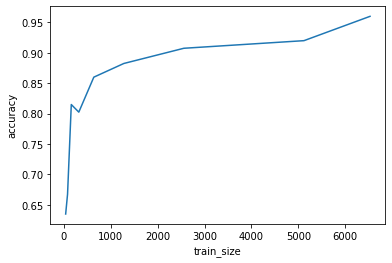

In [422]:
plt.plot(batch,final_result)
plt.xlabel("train_size")
plt.ylabel("accuracy")

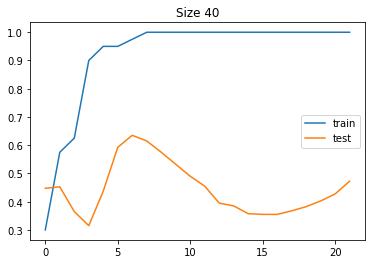

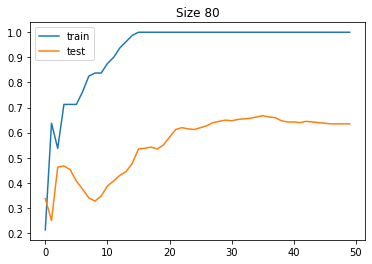

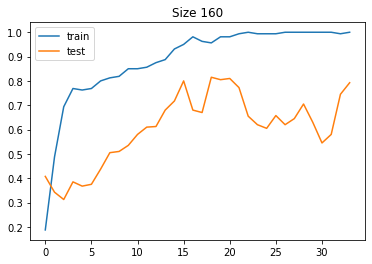

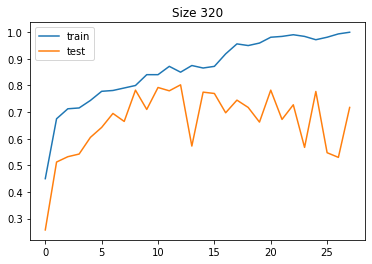

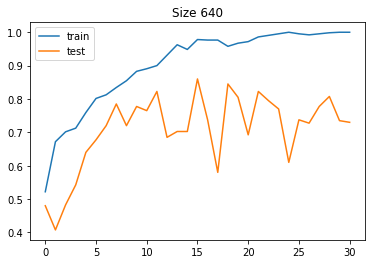

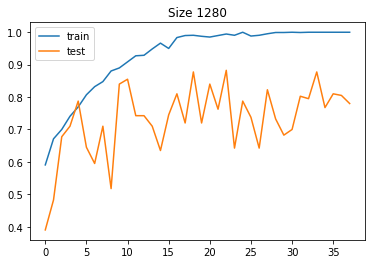

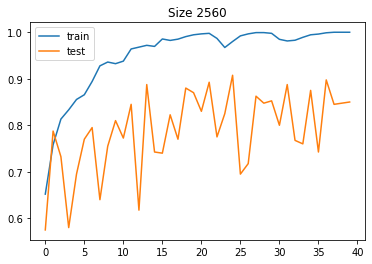

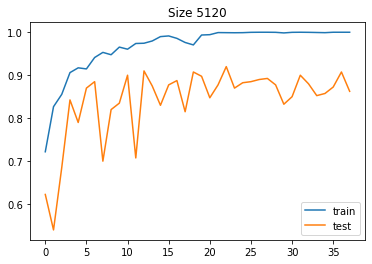

In [452]:
for i in range(len(his_acc_size)):
    name=batch[i]
    plt.plot(his_acc_size[i]["train"])
    plt.plot(his_acc_size[i]["val"])
    plt.legend(["train","test"])
    plt.title("Size {}".format(str(name)))
    plt.show()